In [1]:
# @title Connect To Google Drive { run: "auto", vertical-output: true, form-width: "50px" }
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title Import Library { run: "auto", vertical-output: true, form-width: "50px" }
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import torch
import torch.nn as nn
import torch.optim as optim
import sys
import io
import requests
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sbn
import seaborn as sns
import os

from copy import deepcopy as dc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.utils import shuffle
from scipy.stats import pearsonr, shapiro
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


**DATA COLLECTION**

In [3]:
# @title Import Dataset { form-width: "50px" }

py_file_location = "/content/drive/MyDrive/WIA1006"
sys.path.append(os.path.abspath(py_file_location))

oilGas_csv = '/content/drive/MyDrive/WIA1006/oil_and_gas_data.csv'
oilGas_df = pd.read_csv(oilGas_csv)

print(oilGas_df.head())

      Symbol        Date   Open   High    Low  Close  Volume Currency
0  Brent Oil  2000-01-04  23.90  24.70  23.89  24.39   32509      USD
1  Brent Oil  2000-01-05  24.25  24.37  23.70  23.73   30310      USD
2  Brent Oil  2000-01-06  23.55  24.22  23.35  23.62   44662      USD
3  Brent Oil  2000-01-07  23.57  23.98  23.05  23.09   34826      USD
4  Brent Oil  2000-01-10  23.04  23.78  23.04  23.73   26388      USD


**Feature Selection/ Extraction**

(5768, 7)
(5744, 7)
(5770, 7)
(5742, 7)
      Symbol        Date   Open   High    Low  Close  Volume Currency
0  Brent Oil  2000-01-04  23.90  24.70  23.89  24.39   32509      USD
1  Brent Oil  2000-01-05  24.25  24.37  23.70  23.73   30310      USD
2  Brent Oil  2000-01-06  23.55  24.22  23.35  23.62   44662      USD
3  Brent Oil  2000-01-07  23.57  23.98  23.05  23.09   34826      USD
4  Brent Oil  2000-01-10  23.04  23.78  23.04  23.73   26388      USD


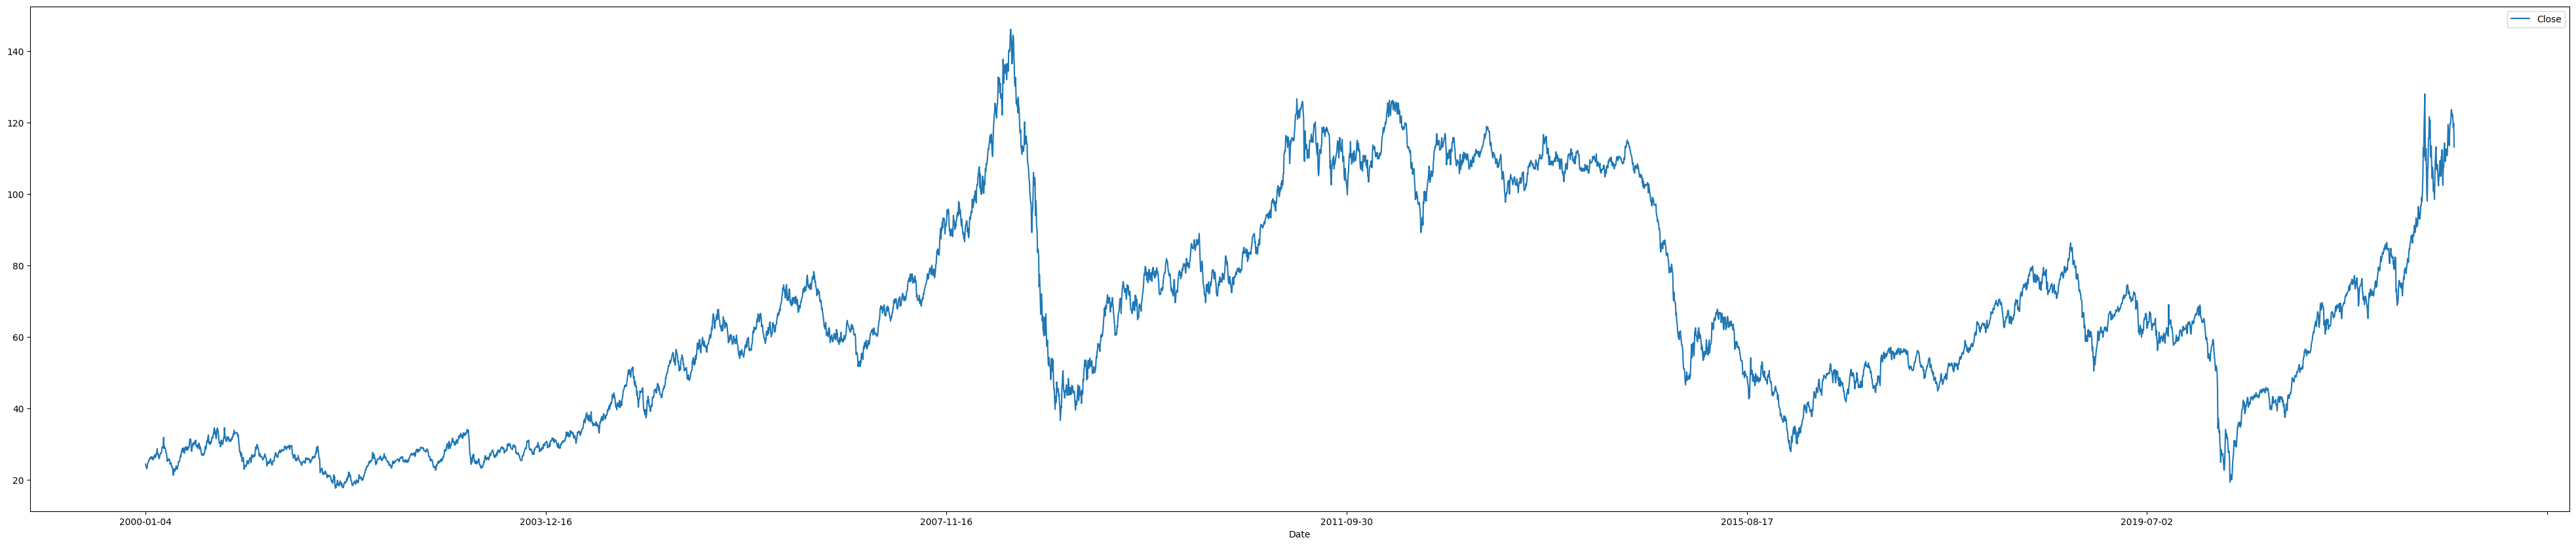

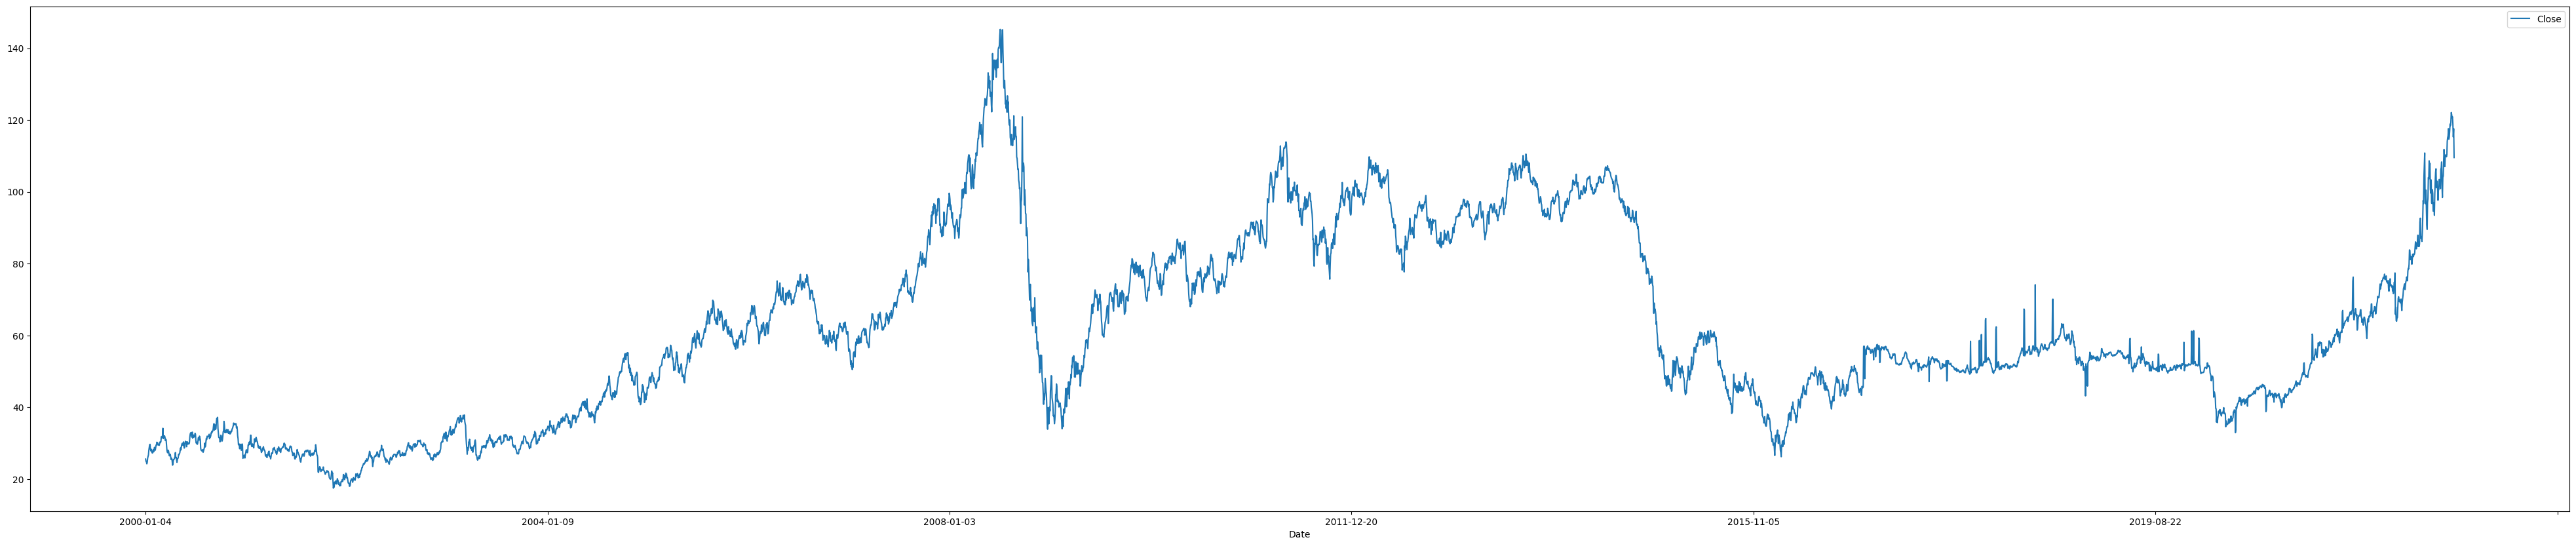

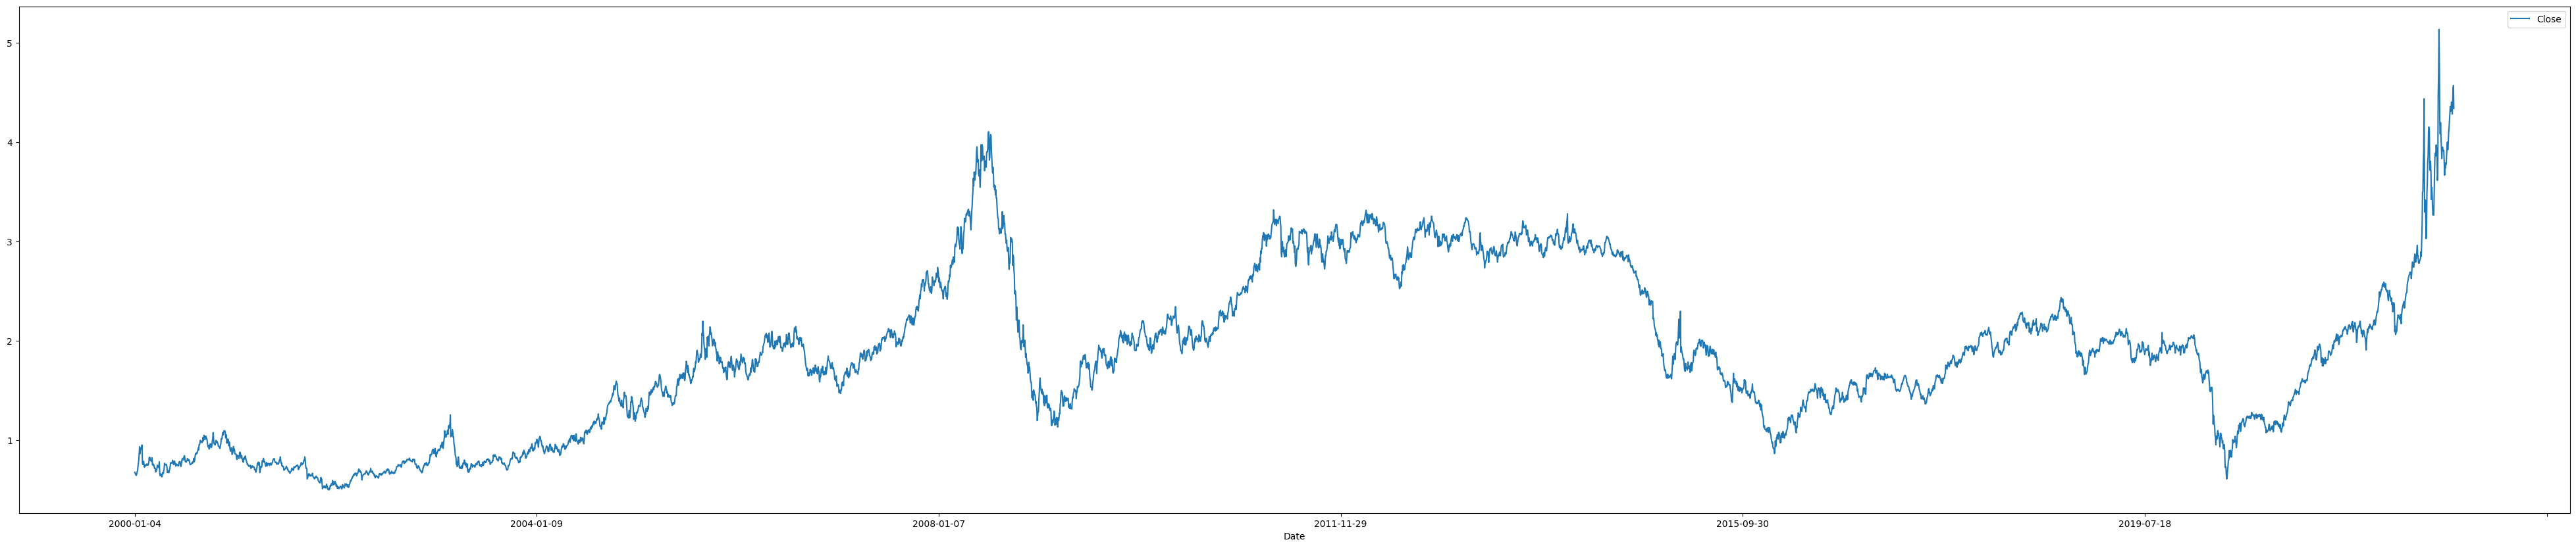

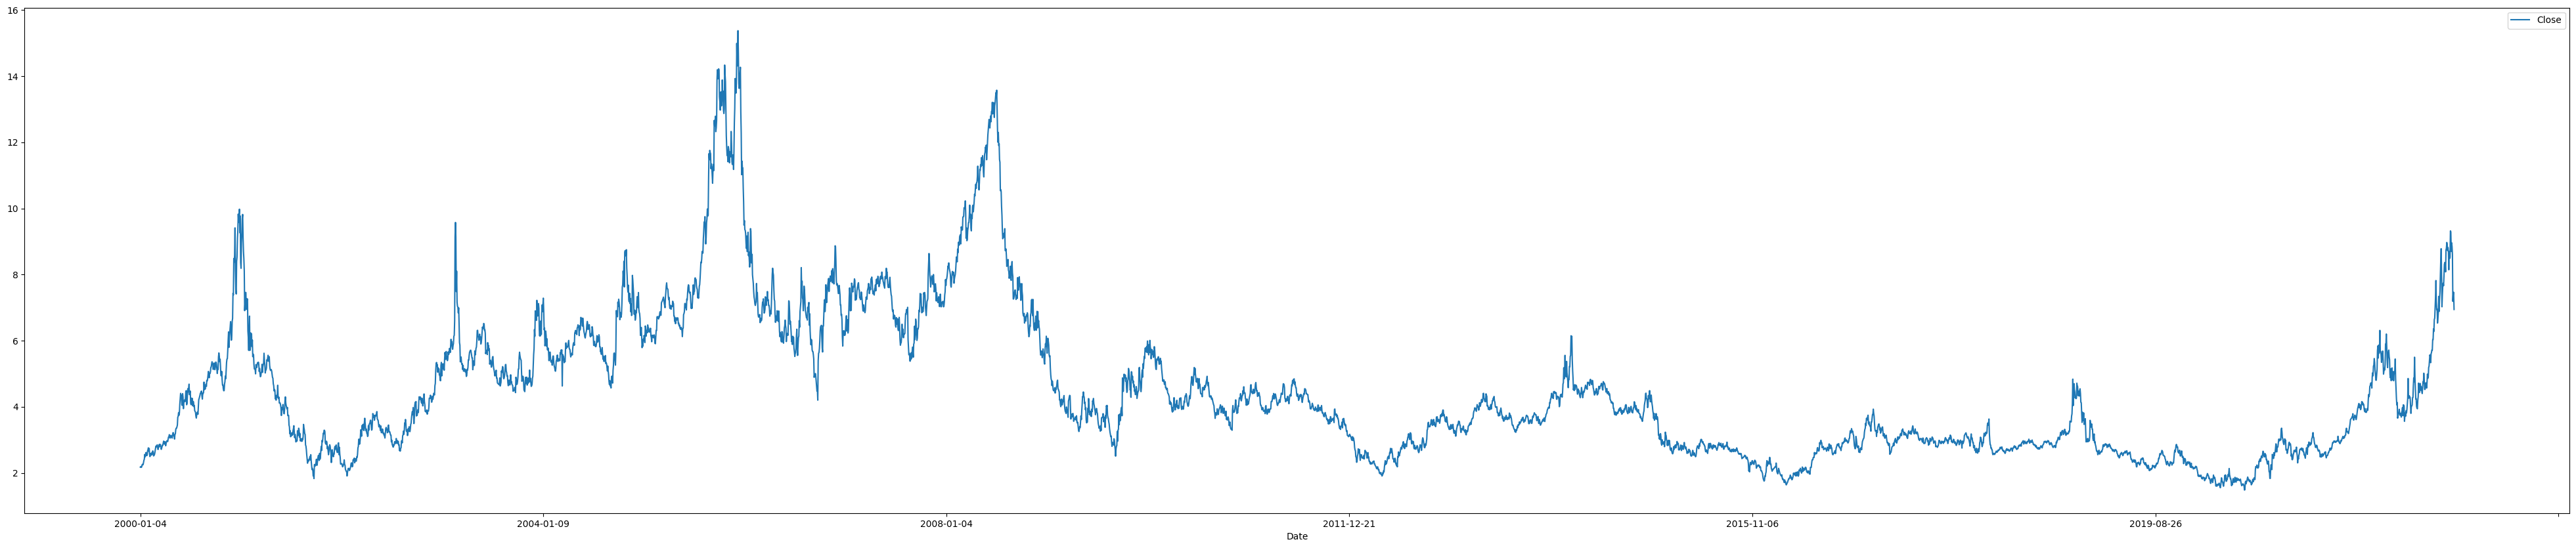

In [4]:
# @title Splitting Oil Type { form-width: "50px" }

oilGas_df_list = [d for _, d in oilGas_df.groupby(['Symbol'])]

# Showing the difference between each oil
temp_brentOil_df = oilGas_df_list[0].drop(['Symbol'], axis=1)
print(temp_brentOil_df.shape)
temp_brentOil_df.plot(legend=True, x='Date', y='Close', figsize=(50, 10))

temp_crudeOil_df = oilGas_df_list[1].drop(['Symbol'], axis=1)
print(temp_crudeOil_df.shape)
temp_crudeOil_df.plot(legend=True, x='Date', y='Close', figsize=(50, 10))

temp_heatingOil_df = oilGas_df_list[2].drop(['Symbol'], axis=1)
print(temp_heatingOil_df.shape)
temp_heatingOil_df.plot(legend=True, x='Date', y='Close', figsize=(50, 10))

temp_naturalOil_df = oilGas_df_list[3].drop(['Symbol'], axis=1)
print(temp_naturalOil_df.shape)
temp_naturalOil_df.plot(legend=True, x='Date', y='Close', figsize=(50, 10))

# Remove Symbol
brentOil_df = oilGas_df_list[0]
print(brentOil_df.head())
brentOil_df = oilGas_df_list[0].drop(['Symbol'], axis=1)

**DATA PREPROCESSING**

In [5]:
# @title Impute Dataset { run: "auto", form-width: "50px" }

# ################################# Impute DatasSet ################################################
def impute_dataset(df: pd.DataFrame):
    cols = df.columns

    for column in df.select_dtypes(include=['number']).columns:
        mean_value = df[column].mean()

        df[column].fillna(mean_value, inplace=True)


impute_dataset(brentOil_df)


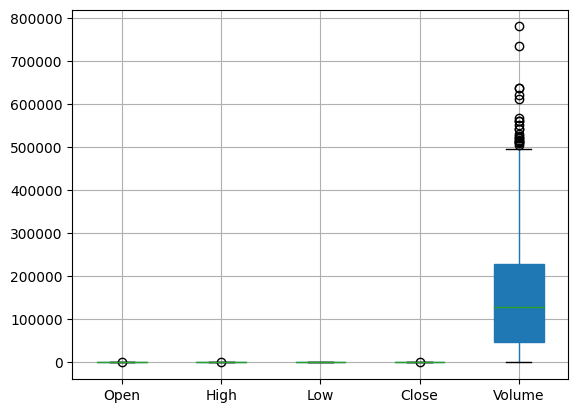

            Date    Open    High     Low   Close  Volume Currency
0     2000-01-04   23.90   24.70   23.89   24.39   32509      USD
1     2000-01-05   24.25   24.37   23.70   23.73   30310      USD
2     2000-01-06   23.55   24.22   23.35   23.62   44662      USD
3     2000-01-07   23.57   23.98   23.05   23.09   34826      USD
4     2000-01-10   23.04   23.78   23.04   23.73   26388      USD
...          ...     ...     ...     ...     ...     ...      ...
5763  2022-06-13  121.94  123.70  118.93  122.27  257105      USD
5764  2022-06-14  121.88  125.19  118.91  121.17  291264      USD
5765  2022-06-15  120.79  121.88  117.75  118.51  231061      USD
5766  2022-06-16  119.65  120.29  115.56  119.81  276675      USD
5767  2022-06-17  119.13  121.25  111.72  113.12  319905      USD

[5744 rows x 7 columns]


In [6]:
# @title Remove Outliers { form-width: "50px" }

def check_outlier(df: pd.DataFrame):
    curr_df = df
    cols = curr_df.columns

    curr_df.boxplot(patch_artist=True)
    plt.show()


check_outlier(brentOil_df)


def remove_outliers(df: pd.DataFrame):
    curr_df = df
    cols = curr_df.columns

    for i in range(len(cols)):
        col = cols[i]

        if col == 'Close':
            continue

        if curr_df[col].dtypes == 'object':
            continue

        Q1 = curr_df[col].quantile(0.25)
        Q3 = curr_df[col].quantile(0.75)

        IQR = Q3 - Q1

        Lower_Range = Q1 - (1.5 * IQR)
        Upper_Range = Q3 + (1.5 * IQR)

        # count = ((curr_df[col] < Lower_Range) | (curr_df[col] > Upper_Range)).sum()
        curr_df = curr_df[~((curr_df[col] < Lower_Range) | (curr_df[col] > Upper_Range))]

    return curr_df


brentOil_df = remove_outliers(brentOil_df)
print(brentOil_df)


In [7]:
# @title Remove Duplicate Column { form-width: "50px" }

def remove_duplicate_column(df: pd.DataFrame):
    curr_df = df
    cols = curr_df.columns

    for i in range(len(cols)):
        col = cols[i]
        curr_arr = curr_df[col].unique()
        # print(curr_arr)

        if (len(curr_arr) == 1):
            curr_df = curr_df.drop(col, axis=1)

    return curr_df

print("Dataset before removing duplicate: ")
print(brentOil_df.head())
print()
brentOil_df = remove_duplicate_column(brentOil_df)
print("Dataset after removing duplicate: ")
print(brentOil_df.head())

Dataset before removing duplicate: 
         Date   Open   High    Low  Close  Volume Currency
0  2000-01-04  23.90  24.70  23.89  24.39   32509      USD
1  2000-01-05  24.25  24.37  23.70  23.73   30310      USD
2  2000-01-06  23.55  24.22  23.35  23.62   44662      USD
3  2000-01-07  23.57  23.98  23.05  23.09   34826      USD
4  2000-01-10  23.04  23.78  23.04  23.73   26388      USD

Dataset after removing duplicate: 
         Date   Open   High    Low  Close  Volume
0  2000-01-04  23.90  24.70  23.89  24.39   32509
1  2000-01-05  24.25  24.37  23.70  23.73   30310
2  2000-01-06  23.55  24.22  23.35  23.62   44662
3  2000-01-07  23.57  23.98  23.05  23.09   34826
4  2000-01-10  23.04  23.78  23.04  23.73   26388


**DATA PREPARATION**

In [8]:
# @title Convert Data Time { run: "auto" }
# Convert date object to datetime
brentOil_df['Date'] = pd.to_datetime(brentOil_df['Date'])

print(brentOil_df)

           Date    Open    High     Low   Close  Volume
0    2000-01-04   23.90   24.70   23.89   24.39   32509
1    2000-01-05   24.25   24.37   23.70   23.73   30310
2    2000-01-06   23.55   24.22   23.35   23.62   44662
3    2000-01-07   23.57   23.98   23.05   23.09   34826
4    2000-01-10   23.04   23.78   23.04   23.73   26388
...         ...     ...     ...     ...     ...     ...
5763 2022-06-13  121.94  123.70  118.93  122.27  257105
5764 2022-06-14  121.88  125.19  118.91  121.17  291264
5765 2022-06-15  120.79  121.88  117.75  118.51  231061
5766 2022-06-16  119.65  120.29  115.56  119.81  276675
5767 2022-06-17  119.13  121.25  111.72  113.12  319905

[5744 rows x 6 columns]


In [9]:
# @title Analyse & Remove Weekend { run: "auto", form-width: "50px" }

def remove_weekend(df:pd.DataFrame):
    curr_df = df
    curr_df = curr_df[curr_df['Volume'] != 0]

    return curr_df

brentOil_df = remove_weekend(brentOil_df)
print(brentOil_df)


# num_rows_with_zero_volume = len(oilGas_df[oilGas_df['Volume'] == 0])
# print("Number of rows with volume of 0:", num_rows_with_zero_volume)


           Date    Open    High     Low   Close  Volume
0    2000-01-04   23.90   24.70   23.89   24.39   32509
1    2000-01-05   24.25   24.37   23.70   23.73   30310
2    2000-01-06   23.55   24.22   23.35   23.62   44662
3    2000-01-07   23.57   23.98   23.05   23.09   34826
4    2000-01-10   23.04   23.78   23.04   23.73   26388
...         ...     ...     ...     ...     ...     ...
5763 2022-06-13  121.94  123.70  118.93  122.27  257105
5764 2022-06-14  121.88  125.19  118.91  121.17  291264
5765 2022-06-15  120.79  121.88  117.75  118.51  231061
5766 2022-06-16  119.65  120.29  115.56  119.81  276675
5767 2022-06-17  119.13  121.25  111.72  113.12  319905

[5740 rows x 6 columns]


In [10]:
# @title Divide t time intervals { form-width: "50px" }


def prepare_dataframe_for_lstm(df:pd.DataFrame, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
brentOil_df = prepare_dataframe_for_lstm(brentOil_df, lookback)
print(brentOil_df.head())


             Open   High    Low  Close  Volume  Close(t-1)  Close(t-2)  \
Date                                                                     
2000-01-13  24.84  25.25  24.70  24.98   22307       24.81       24.62   
2000-01-14  24.98  25.56  24.98  25.47    8822       24.98       24.81   
2000-01-17  25.55  25.75  25.42  25.65   16286       25.47       24.98   
2000-01-18  25.95  26.13  25.62  26.05   39950       25.65       25.47   
2000-01-19  26.30  26.30  25.65  25.84   38024       26.05       25.65   

            Close(t-3)  Close(t-4)  Close(t-5)  Close(t-6)  Close(t-7)  
Date                                                                    
2000-01-13       23.73       23.09       23.62       23.73       24.39  
2000-01-14       24.62       23.73       23.09       23.62       23.73  
2000-01-17       24.81       24.62       23.73       23.09       23.62  
2000-01-18       24.98       24.81       24.62       23.73       23.09  
2000-01-19       25.47       24.98       24

In [11]:
# @title Feature Scaling  { form-width: "50px" }

#Feature Scaling

minmax_scaler = preprocessing.MinMaxScaler()

brendOilStd_scale = minmax_scaler.fit_transform(brentOil_df)
brentOil_df = pd.DataFrame(brendOilStd_scale, columns = brentOil_df.columns)
print(brentOil_df.shape)
print(brentOil_df.head())


(5733, 12)
       Open      High       Low     Close    Volume  Close(t-1)  Close(t-2)  \
0  0.058417  0.055970  0.068019  0.056854  0.034943    0.055530    0.054050   
1  0.059516  0.058380  0.070203  0.060670  0.007435    0.056854    0.055530   
2  0.063992  0.059857  0.073635  0.062072  0.022661    0.060670    0.056854   
3  0.067133  0.062811  0.075195  0.065187  0.070932    0.062072    0.060670   
4  0.069881  0.064132  0.075429  0.063551  0.067003    0.065187    0.062072   

   Close(t-3)  Close(t-4)  Close(t-5)  Close(t-6)  Close(t-7)  
0    0.047118    0.042134    0.046262    0.047118    0.052259  
1    0.054050    0.047118    0.042134    0.046262    0.047118  
2    0.055530    0.054050    0.047118    0.042134    0.046262  
3    0.056854    0.055530    0.054050    0.047118    0.042134  
4    0.060670    0.056854    0.055530    0.054050    0.047118  


**Model Selection**

In [12]:
# @title KNN Model

class KNN:
  def __init__(self, k):
    self.k = k
    self.model = KNeighborsRegressor(n_neighbors=k)

  def fit(self, X, y):
    self.model.fit(X, y)

  def predict(self, X):
    return self.model.predict(X)


In [13]:
# @title Neural Network Model { form-width: "50px" }

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


def train_one_epoch():
    model.train(True)
    # print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            # print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1, avg_loss_across_batches))
            running_loss = 0.0


def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    # print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    # print('***************************************************')
    # print()


def compute_mse(model, data_loader, loss_function):
    total_loss = 0.0
    num_samples = 0
    with torch.no_grad():
        for batch in data_loader:
            inputs, labels = batch[0].to(device), batch[1].to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            num_samples += inputs.size(0)
    return total_loss / num_samples


def compute_accuracy(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in data_loader:
            inputs, labels = batch[0].to(device), batch[1].to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total * 100


class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]



In [14]:
# @title Lasso Regression Model { form-width: "50px" }

class LassoRegressionCVModel:
    def __init__(self, start_value, end_value, step_size, n_splits, n_repeats):
        self.start_value = start_value
        self.end_value = end_value
        self.step_size = step_size
        self.n_splits = n_splits
        self.n_repeats = n_repeats
        self.cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats)
        self.model = LassoCV(alphas=arange(start_value, end_value, step_size), cv=self.cv)

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred


In [15]:
# @title Decision Tree Model { form-width: "50px" }

class DecisionTreeModel:
    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.model = DecisionTreeRegressor(max_depth=max_depth)

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred


In [16]:
# @title Support Vector Machine Model { form-width: "50px" }
from sklearn.svm import SVR

class SVMModel:
  def __init__(self, kernel, C, epsilon):
    self.kernel = kernel
    self.C = C
    self.epsilon = epsilon
    self.model = SVR(kernel=kernel, C=C, epsilon=epsilon)

  def fit(self, X_train, y_train):
    self.model.fit(X_train, y_train)

  def predict(self, X_test):
    y_pred = self.model.predict(X_test)
    return y_pred


In [17]:
# @title Linear Regression Model { form-width: "50px" }

class LinearRegressionModel:
    def __init__(self):
        self.model = LinearRegression()

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred


In [18]:
# @title Predict Value { form-width: "50px" }

X = brentOil_df.drop(['Close'], axis=1)
y = brentOil_df['Close']

num_columns = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tensor Flow
X_train_tensor = torch.tensor(X_train.to_numpy().reshape((-1, num_columns, 1))).float()
X_test_tensor = torch.tensor(X_test.to_numpy().reshape((-1, num_columns, 1))).float()
y_train_tensor = torch.tensor(y_train.to_numpy().reshape((-1, 1))).float()
y_test_tensor = torch.tensor(y_test.to_numpy().reshape((-1, 1))).float()


# Building Model

knnModel = KNN(5)

model = LSTM(1, 4, 1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

lassoCVModel = LassoRegressionCVModel(0.01, 1, 0.01, 10, 3)

decisionTreeModel = DecisionTreeModel(5)

svmModel = SVMModel('rbf', 100, 0.1)

linearRegressionModel = LinearRegressionModel()


# Training Neural Network

train_dataset = TimeSeriesDataset(X_train_tensor, y_train_tensor)
test_dataset = TimeSeriesDataset(X_test_tensor, y_test_tensor)

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

learning_rate = 0.001
num_epochs = 5
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    train_mse = compute_mse(model, train_loader, loss_function)
    # print(f'Train MSE after epoch {epoch + 1}: {train_mse}')


    validate_one_epoch()
    validation_mse = compute_mse(model, test_loader, loss_function)
    # print(f'Validation MSE after epoch {epoch + 1}: {validation_mse}')


with torch.no_grad():
    predicted = model(X_train_tensor.to(device)).to('cpu').numpy()

with torch.no_grad():
    predicted = model(X_test_tensor.to(device)).to('cpu').numpy()


metrics_tensor_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test_tensor, predicted),
metrics.mean_squared_error (y_test_tensor, predicted),
np.sqrt (metrics.mean_squared_error (y_test_tensor, predicted)),
metrics.explained_variance_score (y_test_tensor, predicted)]}).round(3)
print("Performance for Neural Network: ")
print(metrics_tensor_df)
print()

# Training KNN Model

knnModel.fit(X_train, y_train)
prediction = knnModel.predict(X_test)

metrics_df = pd.DataFrame({'Metric':
                               ['MAE',
                                'MSE',
                                'RMSE',
                                'R-Squared'], 'Value':
                               [metrics.mean_absolute_error(y_test, prediction),
                                metrics.mean_squared_error(y_test, prediction),
                                np.sqrt(metrics.mean_squared_error(y_test, prediction)),
                                metrics.explained_variance_score(y_test, prediction)]}).round(3)

print("performance for KNN: ")
print(metrics_df)
print()

# Training Lasso Regression Model

lassoCVModel.fit(X_train, y_train)
prediction = lassoCVModel.predict(X_test)

metrics_df = pd.DataFrame({'Metric':
                               ['MAE',
                                'MSE',
                                'RMSE',
                                'R-Squared'], 'Value':
                               [metrics.mean_absolute_error(y_test, prediction),
                                metrics.mean_squared_error(y_test, prediction),
                                np.sqrt(metrics.mean_squared_error(y_test, prediction)),
                                metrics.explained_variance_score(y_test, prediction)]}).round(3)

print("performance for Lasso Regression: ")
print(metrics_df)
print()

# Training Decision Tree Model

decisionTreeModel.fit(X_train, y_train)
prediction = decisionTreeModel.predict(X_test)

metrics_df = pd.DataFrame({'Metric':
                               ['MAE',
                                'MSE',
                                'RMSE',
                                'R-Squared'], 'Value':
                               [metrics.mean_absolute_error(y_test, prediction),
                                metrics.mean_squared_error(y_test, prediction),
                                np.sqrt(metrics.mean_squared_error(y_test, prediction)),
                                metrics.explained_variance_score(y_test, prediction)]}).round(3)

print("performance for Decision Tree: ")
print(metrics_df)
print()

# Training Support Vector Machine (SVM)

svmModel.fit(X_train, y_train)
prediction = svmModel.predict(X_test)

metrics_df = pd.DataFrame({'Metric':
                               ['MAE',
                                'MSE',
                                'RMSE',
                                'R-Squared'], 'Value':
                               [metrics.mean_absolute_error(y_test, prediction),
                                metrics.mean_squared_error(y_test, prediction),
                                np.sqrt(metrics.mean_squared_error(y_test, prediction)),
                                metrics.explained_variance_score(y_test, prediction)]}).round(3)

print("performance for Support Vector Machine (SVM): ")
print(metrics_df)
print()

# Training Linear Regression:

linearRegressionModel.fit(X_train, y_train)
prediction = linearRegressionModel.predict(X_test)

metrics_df = pd.DataFrame({'Metric':
                               ['MAE',
                                'MSE',
                                'RMSE',
                                'R-Squared'], 'Value':
                               [metrics.mean_absolute_error(y_test, prediction),
                                metrics.mean_squared_error(y_test, prediction),
                                np.sqrt(metrics.mean_squared_error(y_test, prediction)),
                                metrics.explained_variance_score(y_test, prediction)]}).round(3)

print("performance for Linear Regression: ")
print(metrics_df)



Performance for Neural Network: 
      Metric  Value
0        MAE  0.018
1        MSE  0.001
2       RMSE  0.024
3  R-Squared  0.989

performance for KNN: 
      Metric  Value
0        MAE  0.007
1        MSE  0.000
2       RMSE  0.010
3  R-Squared  0.998

performance for Lasso Regression: 
      Metric  Value
0        MAE  0.036
1        MSE  0.002
2       RMSE  0.044
3  R-Squared  0.963

performance for Decision Tree: 
      Metric  Value
0        MAE  0.008
1        MSE  0.000
2       RMSE  0.011
3  R-Squared  0.998

performance for Support Vector Machine (SVM): 
      Metric  Value
0        MAE  0.026
1        MSE  0.001
2       RMSE  0.032
3  R-Squared  0.984

performance for Linear Regression: 
      Metric  Value
0        MAE  0.003
1        MSE  0.000
2       RMSE  0.004
3  R-Squared  1.000


**Model Training And Hyperparameter Tuning**

In [19]:
# Define Hyperparameter for Grid Search


# Create pipelines for each regression model to perform hyperparameter tuning
pipelines = {
    'LinearRegression': Pipeline([('regressor', LinearRegressionModel().model)]),
    'LassoRegression': Pipeline([('regressor', LassoRegressionCVModel(0.01, 1, 0.01, 10, 3).model)]),
    'NeuralNetwork': Pipeline([('regressor', LSTM(1, 4, 1).to(device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')))]),
    'DecisionTree': Pipeline([('regressor', DecisionTreeModel(6).model)]),
    'KNN': Pipeline([('regressor', KNN(5).model)]),
    'SVM': Pipeline([('regressor', SVMModel('rbf', 100, 0.1).model)])
}

# Define the hyperparameters for each model
parameters = {
    'LinearRegression': {},
    'LassoRegression': {},
    'NeuralNetwork': {},
    'DecisionTree': {},
    'KNN': {},
    'SVM': {}
}

# Perform GridSearchCV on each pipeline
best_estimators = {}


for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, parameters[model_name], cv=5, n_jobs=-1)

    if (model_name == 'NeuralNetwork'):
        best_score = metrics.explained_variance_score(y_test_tensor, predicted)
        none = {}
        print(f"{model_name}: Best parameters: {none}, Best score: {best_score}")
    else:
        grid_search.fit(X_train, y_train)
        best_estimators[model_name] = grid_search.best_estimator_
        print(f"{model_name}: Best parameters: {grid_search.best_params_}, Best score: {grid_search.best_score_}")


# Print the best model and its parameters
best_model_name = max(best_estimators, key=lambda x: best_estimators[x].score(X_test, y_test))
best_model = best_estimators[best_model_name]

print(f"\nBest model: {best_model_name}, Test score: {best_model.score(X_test, y_test)}")
# print(f"Best parameters: {best_model.get_params()}")
print()

# Create a list of dictionaries for each model's results
results_list = [
    {'model': 'LinearRegression', 'best_params': {}, 'best_score':0.9996446550622504},
    {'model': 'LassoRegression', 'best_params': {'regressor__alpha': 0.01}, 'best_score': 0.9628828870804778},
    {'model': 'NeuralNetwork', 'best_params': {'regressor__input_layer': 1,'regressor__hidden_layer': 4, 'regressor__output_layer': 1}, 'best_score': 0.9903835654258728},
    {'model': 'DecisionTree', 'best_params': {'regressor__max_depth': 5}, 'best_score': 0.9988296982579575},
    {'model': 'KNN', 'best_params': {'regressor__max_depth': 5, 'regressor__n_estimators': 1000}, 'best_score': 0.9977873119674825},
    {'model': 'SVM', 'best_params': {'regressor__C': 1, 'regressor__kernel': 'rbf'}, 'best_score': 0.9807568420307989}
]

# Convert the list of dictionaries to a dataframe
results_df = pd.DataFrame(results_list)

# Print the dataframe
results_df.sort_values(by = 'best_score',ascending=False)



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


LinearRegression: Best parameters: {}, Best score: 0.9996446550622504
LassoRegression: Best parameters: {}, Best score: 0.9628828870804778
NeuralNetwork: Best parameters: {}, Best score: 0.9889889359474182
DecisionTree: Best parameters: {}, Best score: 0.9988294744263353
KNN: Best parameters: {}, Best score: 0.9977873119674825
SVM: Best parameters: {}, Best score: 0.9807568420307989

Best model: LinearRegression, Test score: 0.9997251615734499



model                                        best_params  \
0  LinearRegression                                                 {}   
3      DecisionTree                        {'regressor__max_depth': 5}   
4               KNN  {'regressor__max_depth': 5, 'regressor__n_esti...   
2     NeuralNetwork  {'regressor__input_layer': 1, 'regressor__hidd...   
5               SVM    {'regressor__C': 1, 'regressor__kernel': 'rbf'}   
1   LassoRegression                         {'regressor__alpha': 0.01}   

   best_score  
0    0.999645  
3    0.998830  
4    0.997787  
2    0.990384  
5    0.980757  
1    0.962883

**Model Evaluation**

Accuracy for Brent Oil:  0.9874898589873246


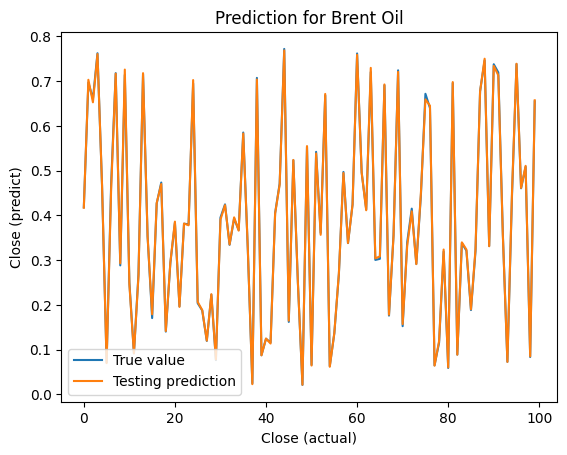

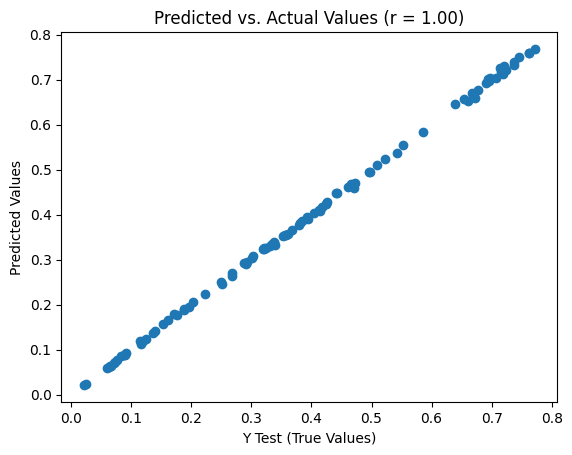

In [20]:
# @title Splitting DataSet { form-width: "50px" }
from scipy.stats import pearsonr, shapiro


linearRegressionModel = LinearRegressionModel()


def compute_accuracy(y_true, y_pred):
    accuracy = 1- np.sum(np.abs((y_true - y_pred)) / y_true) / len(y_true)
    return accuracy

# Train data and plot a graph betwwen accuracy and y_prediction

# 1.) Brute Oil
linearRegressionModel.fit(X_train, y_train)
y_predict = linearRegressionModel.predict(X_test)

y_test_tensor = torch.tensor(y_test.to_numpy().reshape((-1, 1))).float()
y_predict_tensor = torch.tensor(y_predict.reshape((-1, 1))).float()

accuracy = compute_accuracy(y_test.to_numpy(), y_predict)
print("Accuracy for Brent Oil: ", accuracy)
plt.plot(y_test_tensor[:100], label='True value')
plt.plot(y_predict_tensor[:100], label='Testing prediction')
plt.xlabel('Close (actual)')
plt.ylabel('Close (predict)')
plt.title("Prediction for Brent Oil")
plt.legend()
plt.show()

plt.scatter(y_test[:100], y_predict[:100])
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test[:100], y_predict[:100])[0], 2))
plt.show()

